<a href="https://colab.research.google.com/github/fshnkarimi/Labeling/blob/Afshin/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn

     |████████████████████████████████| 374 kB 4.0 MB/s 


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from hmmlearn import hmm
import matplotlib.pyplot as plt


In [ ]:
def visualize(dfs,col_name ,data_name, tr , start , end ):
  closing_price= dfs[col_name]
  label=labeling(dfs[col_name],tr)   
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=dfs[data_name][start:end], y=dfs[col_name][start:end]))
  fig.show()
  fig = go.Figure([go.Scatter(x=dfs[data_name][start:end], y=label[start:end])],)
  fig.show()
  return closing_price, label

In [ ]:
#labelling algorithm X is price and w is our threshould
def labeling(X,w):
    n = len(X)
    y = np.array([0 for i in range(n)])
    FP=X[0]
    xh = X[0]
    xl = X[0]
    HT = 0
    LT = 0
    cid = 0
    FP_N = 0
    for i in range(n):
        if(X[i] > FP + X[0]*w):
            xh,HT,FP_N,cid  = X[i],i,i,1
            break
        if(X[i] < FP - X[0]*w):
            xh,HT,FP_N,cid  = X[i],i,i,-1
            break
    for i in range(FP_N+1,n):
        if(cid > 0):
            if(X[i]>xh):
                xh,HT = X[i],i
            if(X[i] < xh - xh*w and LT<= HT ):
                for j in range(n):
                    if(j>LT and j<=HT):
                        y[j] = 1
                xl,LT,cid = X[i],i,-1
        if(cid < 0):
            if(X[i]<xl):
                xl,LT = X[i],i
            if(X[i] > xl + xl*w and HT<= LT ):
                for j in range(n):
                    if(j>HT and j<=LT):
                        y[j] = -1
                xh,HT,cid = X[i],i,1
    return y

In [ ]:

def hmm_plot(df, col):
    hmm_model = hmm.GaussianHMM(n_components=2, covariance_type="diag")
    returns = np.log(dfs[col]).diff()
    returns.dropna(inplace=True)
    X = returns.to_numpy().reshape(-1, 1)
    hmm_model.fit(X)
    Z = hmm_model.predict(X)
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.subplot(211)
    plt.plot(Z)
    plt.subplot(212)
    plt.plot(returns);
    # set the transition matrix intuitively
    hmm_model.transmat_ = np.array([
    [0.999, 0.001],
    [0.001, 0.999],                           
    ])
    # run inference again
    Z = hmm_model.predict(X)
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    plt.subplot(211)
    plt.plot(Z)
    plt.subplot(212)
    plt.plot(returns);

## 000001data

In [ ]:
dfs = pd.read_excel("000001data.xlsx")
dfs = dfs[::-1].reset_index()
dfs

,index,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,6855,2018-12-28,2483.62,2505.11,2478.32,2493.90,119245248,105980854272
1,6854,2018-12-27,2527.72,2532.00,2483.09,2483.09,135406848,112479764480
2,6853,2018-12-26,2501.12,2513.83,2492.08,2498.29,108799632,93989535744
3,6852,2018-12-25,2503.95,2513.96,2462.84,2504.82,140670560,114766012416
4,6851,2018-12-24,2506.74,2529.44,2500.44,2527.01,97339856,85760933888
...,...,...,...,...,...,...,...,...
6851,4,1990-12-25,120.09,120.25,114.55,120.25,15,6510
6852,3,1990-12-24,113.57,114.55,109.13,114.55,32,31063
6853,2,1990-12-21,109.07,109.13,103.73,109.13,28,16096
6854,1,1990-12-20,104.30,104.39,99.98,104.39,197,84992


In [ ]:
dfs.describe()

,index,openingprice,highestprice,lowestprice,closingprice,volume,amounts
count,6856.000000,6856.000000,6856.000000,6856.000000,6856.000000,6.856000e+03,6.856000e+03
mean,3427.500000,1915.247270,1933.851006,1895.060604,1916.460108,7.114424e+07,7.470872e+10
std,1979.301055,1071.941134,1082.764292,1059.818290,1073.271343,1.019074e+08,1.268397e+11
min,0.000000,96.050000,99.980000,95.790000,99.980000,1.500000e+01,6.510000e+03
25%,1713.750000,1155.095000,1166.300000,1140.322500,1155.370000,4.837209e+06,3.720328e+09
50%,3427.500000,1709.530000,1722.640000,1690.420000,1707.530000,2.048506e+07,1.384472e+10
75%,5141.250000,2700.697500,2739.512500,2677.135000,2705.985000,1.131193e+08,1.091630e+11
max,6855.000000,6057.430000,6124.040000,6040.710000,6092.060000,8.571328e+08,1.309925e+12


In [ ]:
visualize(dfs,'closingprice','DATE',0.2,100,5500)

(0       2493.90
 1       2483.09
 2       2498.29
 3       2504.82
 4       2527.01
          ...   
 6851     120.25
 6852     114.55
 6853     109.13
 6854     104.39
 6855      99.98
 Name: closingprice, Length: 6856, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

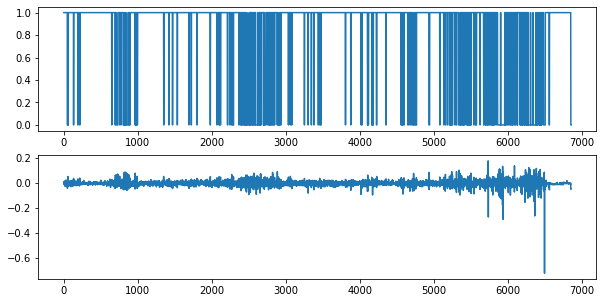

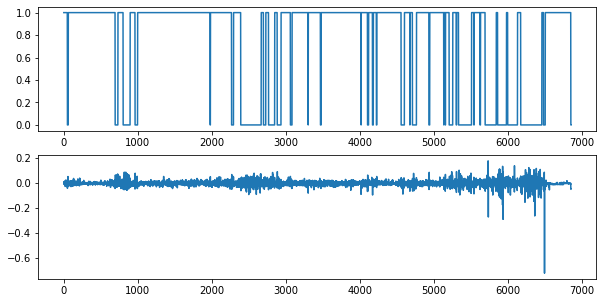

In [ ]:
hmm_plot(dfs, 'closingprice')

## 000004data

In [ ]:
dfs = pd.read_excel("000004data.xlsx")
dfs = dfs[::-1].reset_index()
dfs

,index,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,6483,2018-12-27,130.4063,130.4063,125.5842,125.5842,237.5505,3.229032e+06
1,6482,2018-12-26,126.8313,129.0761,126.6650,127.9121,196.5355,2.656151e+06
2,6481,2018-12-25,128.8267,128.8267,124.6697,126.7482,276.0397,3.701756e+06
3,6480,2018-12-24,127.7459,129.4918,125.9999,129.0761,277.4831,3.780082e+06
4,6479,2018-12-21,128.8267,129.7412,126.7482,127.5796,278.6859,3.774242e+06
...,...,...,...,...,...,...,...,...
6479,4,1991-01-17,15.7400,15.7400,15.7400,15.7400,1.0000,8.000000e+03
6480,3,1991-01-15,15.9000,15.9000,15.9000,15.9000,1.0000,8.000000e+03
6481,2,1991-01-14,15.9800,15.9800,15.9800,15.9800,1.0000,8.000000e+03
6482,1,1991-01-10,16.2200,16.2200,16.2200,16.2200,1.0000,8.000000e+03


In [ ]:
dfs.describe()

,index,openingprice,highestprice,lowestprice,closingprice,volume,amounts
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6.484000e+03
mean,3241.500000,81.736589,83.799540,79.865594,81.955904,1729.113060,1.940831e+07
std,1871.913905,69.818104,71.728722,68.194941,70.072298,2177.434801,3.723297e+07
min,0.000000,5.985000,6.460000,5.890000,6.460000,0.000000,1.000000e+03
25%,1620.750000,34.759925,36.114250,33.488825,34.951000,390.581175,2.651064e+06
50%,3241.500000,59.719000,61.188900,58.490100,59.654000,1015.453450,7.756934e+06
75%,4862.250000,100.226500,101.993175,98.147900,100.413500,2229.035975,1.827720e+07
max,6483.000000,409.591100,431.540100,396.371800,412.999900,29178.784800,5.290912e+08


In [ ]:
visualize(dfs,'closingprice','DATE',0.2,100,5500)

(0       125.5842
 1       127.9121
 2       126.7482
 3       129.0761
 4       127.5796
           ...   
 6479     15.7400
 6480     15.9000
 6481     15.9800
 6482     16.2200
 6483     16.7800
 Name: closingprice, Length: 6484, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

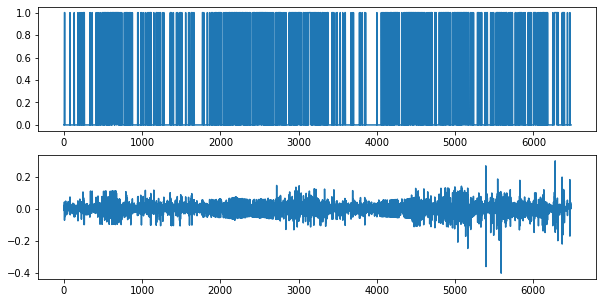

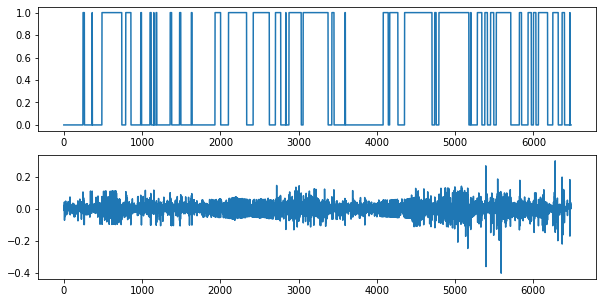

In [ ]:
hmm_plot(dfs, 'closingprice')

## 399001data

In [ ]:
dfs = pd.read_excel("399001data.xlsx")
dfs = dfs[::-1].reset_index()
dfs

,index,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,6808,2018-12-27,7402.60,7415.92,7215.34,7215.34,178064576,151452106752
1,6807,2018-12-26,7323.99,7369.84,7277.56,7289.55,161333008,137367527424
2,6806,2018-12-25,7308.61,7362.07,7180.08,7332.35,196583472,161164247040
3,6805,2018-12-24,7315.26,7393.71,7293.15,7392.56,143855088,127564046336
4,6804,2018-12-21,7399.15,7405.27,7283.76,7337.60,161299104,134924468224
...,...,...,...,...,...,...,...,...
6804,4,1991-04-08,968.57,968.57,968.57,968.57,57,84000
6805,3,1991-04-06,973.42,973.42,973.42,973.42,102,159000
6806,2,1991-04-05,978.27,978.27,978.27,978.27,107,150000
6807,1,1991-04-04,983.11,983.11,983.11,983.11,523,761000


In [ ]:
dfs.describe()

,index,openingprice,highestprice,lowestprice,closingprice,volume,amounts
count,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6.809000e+03,6.809000e+03
mean,3404.000000,6231.746368,6302.900038,6159.362965,6235.894869,6.139640e+07,7.286053e+10
std,1965.733324,4218.947703,4268.110121,4165.425132,4222.029983,8.944928e+07,1.259526e+11
min,0.000000,401.350000,406.930000,396.520000,402.500000,1.000000e+00,1.000000e+03
25%,1702.000000,2992.650000,3022.800000,2961.210000,2993.370000,4.646276e+06,3.137471e+09
50%,3404.000000,4452.250000,4497.310000,4397.120000,4453.140000,1.598489e+07,1.131496e+10
75%,5106.000000,10002.900000,10138.180000,9903.110000,10024.440000,8.853294e+07,8.938762e+10
max,6808.000000,19554.580000,19600.000000,19203.090000,19531.150000,9.008561e+08,1.172654e+12


In [ ]:
visualize(dfs,'closingprice','DATE',0.2,100,5500)

(0       7215.34
 1       7289.55
 2       7332.35
 3       7392.56
 4       7337.60
          ...   
 6804     968.57
 6805     973.42
 6806     978.27
 6807     983.11
 6808     988.05
 Name: closingprice, Length: 6809, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

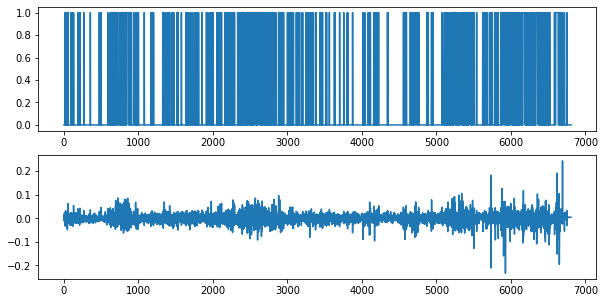

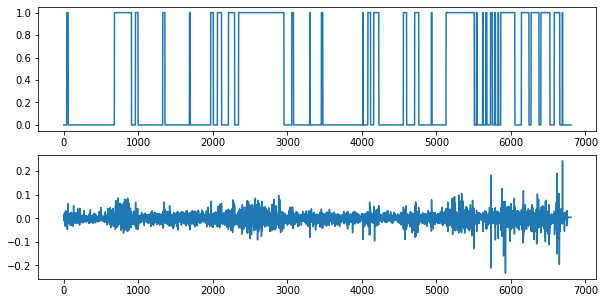

In [ ]:
hmm_plot(dfs, 'closingprice')

## 600601data

In [ ]:
dfs = pd.read_excel("600601data.xlsx")
dfs = dfs[::-1].reset_index()
dfs

,index,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,6731,2018-12-27,15837.4533,16065.5845,15153.0597,15381.1909,4.0636,9.390923e+07
1,6730,2018-12-26,15723.3877,15837.4533,15381.1909,15609.3221,3.4680,8.251728e+07
2,6729,2018-12-25,16179.6501,16179.6501,14924.9285,15723.3877,7.6241,1.619423e+08
3,6728,2018-12-24,16293.7157,16521.8469,16065.5845,16407.7813,2.9126,7.211278e+07
4,6727,2018-12-21,16293.7157,16407.7813,16065.5845,16293.7157,3.7707,8.852586e+07
...,...,...,...,...,...,...,...,...
6727,4,1990-12-28,238.9000,238.9000,238.9000,238.9000,5.0000,4.000000e+03
6728,3,1990-12-26,236.5000,236.5000,236.5000,236.5000,2.0000,1.000000e+03
6729,2,1990-12-21,204.3000,204.3000,204.3000,204.3000,8.0000,6.000000e+03
6730,1,1990-12-20,185.3000,194.6000,185.3000,194.6000,21.0000,1.600000e+04


In [ ]:
dfs.describe()

,index,openingprice,highestprice,lowestprice,closingprice,volume,amounts
count,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6732.000000,6.732000e+03
mean,3365.500000,20417.424671,20998.059715,19883.266395,20446.833118,62.929483,2.735346e+08
std,1943.505338,18634.147725,19306.999072,18009.540021,18677.751066,167.975656,6.583554e+08
min,0.000000,185.300000,185.300000,185.300000,185.300000,0.000000,1.000000e+03
25%,1682.750000,5674.955000,5966.555000,5382.059000,5696.987000,9.409375,1.391068e+07
50%,3365.500000,17092.730050,17504.267650,16704.351800,17117.546400,20.899900,6.734806e+07
75%,5048.250000,28272.358150,28891.822100,27667.810525,28369.752650,51.995425,2.295546e+08
max,6731.000000,147218.207400,153834.012000,140032.074800,146419.748200,3626.253300,1.132143e+10


In [ ]:
visualize(dfs,'closingprice','DATE',0.2,100,5500)

(0       15381.1909
 1       15609.3221
 2       15723.3877
 3       16407.7813
 4       16293.7157
            ...    
 6727      238.9000
 6728      236.5000
 6729      204.3000
 6730      194.6000
 6731      185.3000
 Name: closingprice, Length: 6732, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

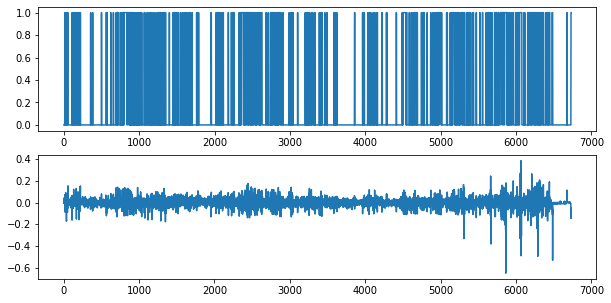

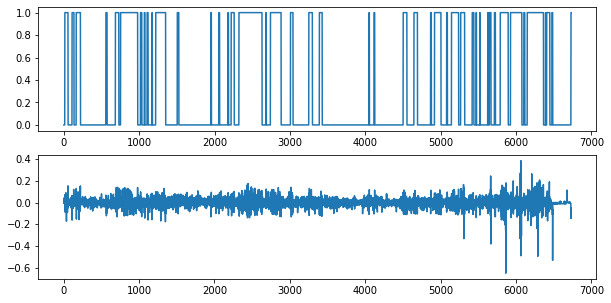

In [ ]:
hmm_plot(dfs, 'closingprice')

## 600615data

In [ ]:
dfs = pd.read_excel("600615data.xlsx")
dfs = dfs[::-1].reset_index()
dfs

,index,DATE,openingprice,highestprice,lowestprice,closingprice,volume,amounts
0,5978,2018-12-27,640.9148,640.9148,610.2685,615.9702,191.9450,1.411958e+07
1,5977,2018-12-26,607.4177,635.2132,607.4177,626.6607,249.6829,1.845371e+07
2,5976,2018-12-25,618.8210,625.9480,601.7161,618.1083,264.5698,1.923856e+07
3,5975,2018-12-24,596.7272,623.0972,596.7272,618.8210,198.0345,1.434707e+07
4,5974,2018-12-21,604.5669,610.9812,592.4509,601.0034,115.0688,8.222198e+06
...,...,...,...,...,...,...,...,...
5974,4,1992-09-16,172.0000,188.5000,172.0000,179.0000,6084.0000,1.081200e+07
5975,3,1992-09-15,165.0000,177.9300,155.5000,172.0000,6640.0000,1.126500e+07
5976,2,1992-09-14,181.0000,189.5000,156.5000,170.0000,10660.0000,1.872600e+07
5977,1,1992-09-11,172.5000,195.5000,168.0000,181.5000,10376.0000,1.859800e+07


In [ ]:
dfs.describe()

,index,openingprice,highestprice,lowestprice,closingprice,volume,amounts
count,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5.979000e+03
mean,2989.000000,499.983323,513.638442,487.782731,500.964125,386.357196,2.554745e+07
std,1726.132961,354.090547,363.148464,346.397871,355.455280,640.335369,3.962597e+07
min,0.000000,-19.755700,-17.565500,-20.193800,-19.755700,3.888900,4.071304e+04
25%,1494.500000,174.818800,179.985050,169.787000,174.818800,79.588650,2.559020e+06
50%,2989.000000,502.835500,516.904300,490.534300,502.835500,209.680300,9.361020e+06
75%,4483.500000,658.181150,675.124600,643.765600,658.780600,463.100600,3.193425e+07
max,5978.000000,2415.548000,2458.310300,2328.598100,2367.796800,20584.000000,5.334925e+08


In [ ]:
visualize(dfs,'closingprice','DATE',0.2,100,5500)

(0       615.9702
 1       626.6607
 2       618.1083
 3       618.8210
 4       601.0034
           ...   
 5974    179.0000
 5975    172.0000
 5976    170.0000
 5977    181.5000
 5978    169.5000
 Name: closingprice, Length: 5979, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



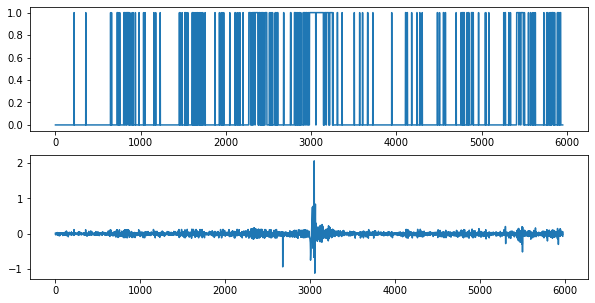

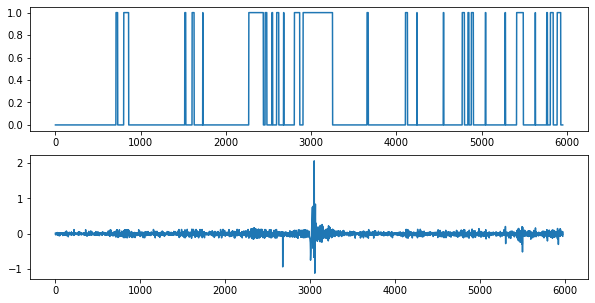

In [ ]:
hmm_plot(dfs, 'closingprice')

## Tesla

In [ ]:
dfs = pd.read_csv("Tesla.csv")
dfs = dfs[::-1].reset_index()
dfs

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,08/04/2011,$4.95,15321165,$5.302,$5.378,$4.934
1,2514,08/05/2011,$4.848,9821880,$4.998,$5.076,$4.566
2,2513,08/08/2011,$4.728,13042360,$4.62,$4.888,$4.62
3,2512,08/09/2011,$5.012,6666910,$4.83,$5.09,$4.74
4,2511,08/10/2011,$4.764,7820735,$5.088,$5.088,$4.726
...,...,...,...,...,...,...,...
2511,4,07/28/2021,$646.98,16006600,$646.995,$654.9699,$639.4001
2512,3,07/29/2021,$677.35,30394640,$649.79,$683.69,$648.8
2513,2,07/30/2021,$687.2,29656410,$671.758,$697.53,$669
2514,1,08/02/2021,$709.67,33615770,$700,$726.94,$698.4


In [ ]:
dfs['Close/Last'] = np.array([float(x[1:]) for x in dfs['Close/Last']])
dfs

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,08/04/2011,4.950,15321165,$5.302,$5.378,$4.934
1,2514,08/05/2011,4.848,9821880,$4.998,$5.076,$4.566
2,2513,08/08/2011,4.728,13042360,$4.62,$4.888,$4.62
3,2512,08/09/2011,5.012,6666910,$4.83,$5.09,$4.74
4,2511,08/10/2011,4.764,7820735,$5.088,$5.088,$4.726
...,...,...,...,...,...,...,...
2511,4,07/28/2021,646.980,16006600,$646.995,$654.9699,$639.4001
2512,3,07/29/2021,677.350,30394640,$649.79,$683.69,$648.8
2513,2,07/30/2021,687.200,29656410,$671.758,$697.53,$669
2514,1,08/02/2021,709.670,33615770,$700,$726.94,$698.4


In [ ]:
dfs.describe()

,index,Close/Last,Volume
count,2516.000000,2516.000000,2.516000e+03
mean,1257.500000,104.100616,3.432368e+07
std,726.450962,175.881972,2.876276e+07
min,0.000000,4.390000,1.197975e+06
25%,628.750000,35.908000,1.647135e+07
50%,1257.500000,47.901000,2.752529e+07
75%,1886.250000,66.596000,4.281434e+07
max,2515.000000,883.090000,3.046938e+08


In [ ]:
visualize(dfs,'Close/Last','Date',0.2,100,2000)

(0         4.950
 1         4.848
 2         4.728
 3         5.012
 4         4.764
          ...   
 2511    646.980
 2512    677.350
 2513    687.200
 2514    709.670
 2515    709.740
 Name: Close/Last, Length: 2516, dtype: float64,
 array([0, 1, 1, ..., 0, 0, 0]))

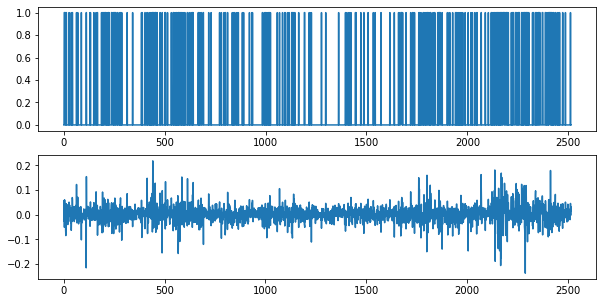

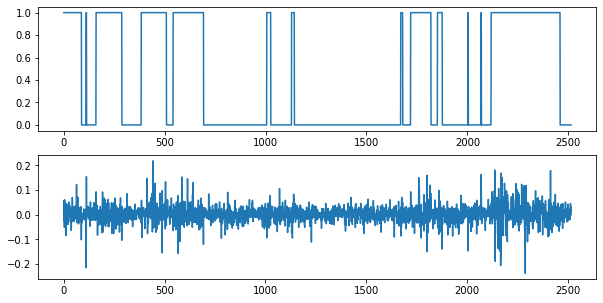

In [ ]:
hmm_plot(dfs, 'Close/Last')

## LIVE

In [ ]:
dfs = pd.read_csv("LIVE.csv")
dfs = dfs[::-1].reset_index()
dfs

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,08/04/2011,$4.2599,448.0,$4.3399,$4.3399,$4.2599
1,2514,08/05/2011,$4.1999,494.0,$4.2599,$4.2599,$4.1399
2,2513,08/08/2011,$3.5599,818.0,$4.0199,$4.0201,$3.5599
3,2512,08/09/2011,$3.5599,560.0,$3.9799,$3.9799,$3.5599
4,2511,08/10/2011,$4.2799,2533.0,$3.6599,$4.7399,$3.4199
...,...,...,...,...,...,...,...
2511,4,07/28/2021,$62.58,27702.0,$63.9,$66.48,$61.66
2512,3,07/29/2021,$64.025,6751.0,$62.73,$65.7999,$62.73
2513,2,07/30/2021,$63.8,8099.0,$64.8059,$64.8059,$62.245
2514,1,08/02/2021,$64.22,4358.0,$63.7,$64.38,$62.69


In [ ]:
dfs['Close/Last'] = np.array([float(x[1:]) for x in dfs['Close/Last']])
dfs

,index,Date,Close/Last,Volume,Open,High,Low
0,2515,08/04/2011,4.2599,448.0,$4.3399,$4.3399,$4.2599
1,2514,08/05/2011,4.1999,494.0,$4.2599,$4.2599,$4.1399
2,2513,08/08/2011,3.5599,818.0,$4.0199,$4.0201,$3.5599
3,2512,08/09/2011,3.5599,560.0,$3.9799,$3.9799,$3.5599
4,2511,08/10/2011,4.2799,2533.0,$3.6599,$4.7399,$3.4199
...,...,...,...,...,...,...,...
2511,4,07/28/2021,62.5800,27702.0,$63.9,$66.48,$61.66
2512,3,07/29/2021,64.0250,6751.0,$62.73,$65.7999,$62.73
2513,2,07/30/2021,63.8000,8099.0,$64.8059,$64.8059,$62.245
2514,1,08/02/2021,64.2200,4358.0,$63.7,$64.38,$62.69


In [ ]:
dfs.describe()

,index,Close/Last,Volume
count,2516.000000,2516.000000,2.481000e+03
mean,1257.500000,13.431446,5.150268e+04
std,726.450962,10.139079,2.157316e+05
min,0.000000,2.200000,5.000000e+01
25%,628.750000,7.588775,4.834000e+03
50%,1257.500000,10.259800,1.152300e+04
75%,1886.250000,15.299700,2.958600e+04
max,2515.000000,70.740000,4.693825e+06


In [ ]:
visualize(dfs,'Close/Last','Date',0.2,100,2000)

(0        4.2599
 1        4.1999
 2        3.5599
 3        3.5599
 4        4.2799
          ...   
 2511    62.5800
 2512    64.0250
 2513    63.8000
 2514    64.2200
 2515    62.5800
 Name: Close/Last, Length: 2516, dtype: float64,
 array([0, 0, 0, ..., 0, 0, 0]))

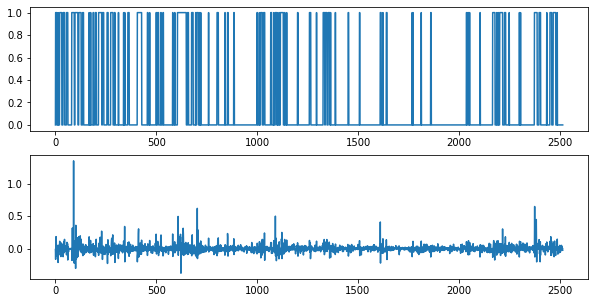

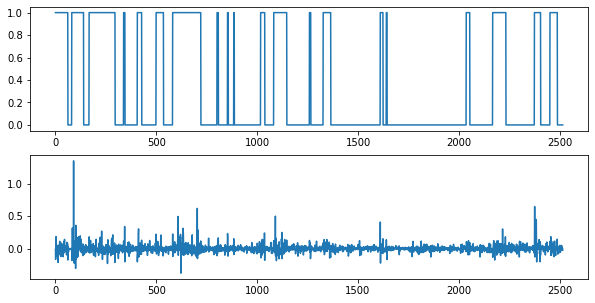

In [ ]:
hmm_plot(dfs, 'Close/Last')

## DATA_newVersion

In [ ]:
dfs = pd.read_excel("DATA_newVersion.xlsx")
dfs

,USD to Rial,Date-S,Date-M,OPEC,Gold,X50C,TEPIX,IND,FSTM,SCNDM,AZDSH,FLZT,Chemic,Cement,Drug,Khodro,Banks,Food,Insurance,Oil Products
0,10486,1389/05/24,2010-08-15,72.64,1224.500000,19910.2,16701.1,12814.4,13768.1,24119.7,21274.7,8345.6,595.1,191.6,1006.3,5471.3,220.3,559.6,2608.9,31196.0
1,10462,1389/05/25,2010-08-16,72.27,1224.500000,19918.5,16766.9,12930.9,13878.7,24386.2,21493.0,8458.6,594.3,191.3,1006.1,5484.9,221.0,561.8,2688.9,31114.5
2,10443,1389/05/26,2010-08-17,73.25,1226.599976,20116.2,16910.8,12978.6,13974.5,24412.5,21622.0,8535.1,593.6,191.3,1007.1,5653.1,222.2,564.8,2748.7,31089.7
3,10450,1389/05/27,2010-08-18,73.05,1229.699951,20292.2,17009.6,12930.8,13955.1,24288.0,21558.1,8529.4,594.1,191.4,1019.8,5789.0,225.6,564.9,2817.4,31502.9
4,10460,1389/05/28,2010-08-19,73.03,1233.800049,20292.2,17009.6,12930.8,13955.1,24288.0,21558.1,8529.4,594.1,191.4,1019.8,5789.0,225.6,564.9,2817.4,31502.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,213020,1399/05/11,2020-08-01,43.02,1962.800049,77430.1,1961621.8,1746720.0,1439790.0,3941960.0,2535570.0,1301190.0,97640.8,13461.3,163871.0,602740.0,10023.1,81109.4,85375.0,9368200.0
3138,217020,1399/05/12,2020-08-02,43.02,1998.000000,79555.9,2011524.3,1792200.0,1468570.0,4074200.0,2592790.0,1327710.0,101256.0,13400.5,168049.0,614350.0,10189.9,82178.6,88497.0,9441890.0
3139,218990,1399/05/13,2020-08-03,44.02,1966.000000,78605.0,1993340.2,1774950.0,1444220.0,4082440.0,2567080.0,1289560.0,101157.0,13133.5,168816.0,598425.0,10114.5,81357.8,90907.7,9209470.0
3140,222960,1399/05/14,2020-08-04,44.27,2001.199951,78515.6,1995044.4,1773820.0,1435450.0,4126680.0,2564400.0,1270060.0,103314.0,13064.6,168780.0,580279.0,10211.8,82282.1,94565.2,8985770.0


In [ ]:
dfs.describe()

,USD to Rial,OPEC,Gold,X50C,TEPIX,IND,FSTM,SCNDM,AZDSH,FLZT,Chemic,Cement,Drug,Khodro,Banks,Food,Insurance,Oil Products
count,3142.000000,3142.000000,3142.000000,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03
mean,51285.799173,75.765207,1380.748664,1.771750e+05,1.350409e+05,1.179010e+05,9.941693e+04,2.683145e+05,1.623996e+05,8.150903e+04,8070.264704,1155.482368,13116.623393,25619.138542,874.337810,6272.520210,6944.229885,4.789082e+05
std,45925.798665,27.551878,192.691442,2.017536e+05,2.521087e+05,2.235718e+05,1.870418e+05,5.005044e+05,3.285065e+05,1.705146e+05,13783.264029,2049.561518,26354.537767,62563.703662,1318.657175,13458.134605,12905.847097,9.919757e+05
min,10198.000000,12.220000,1050.800049,1.828120e+04,1.670110e+04,1.281440e+04,1.376810e+04,2.368780e+04,2.127470e+04,8.345600e+03,589.400000,191.200000,1006.100000,4426.500000,220.300000,559.600000,1402.000000,3.098880e+04
25%,29540.000000,52.640000,1240.699951,3.849090e+04,3.526972e+04,3.020977e+04,2.896130e+04,5.409903e+04,4.288230e+04,2.156950e+04,2206.225000,310.050000,1443.200000,7715.625000,330.925000,1064.225000,2142.350000,9.121582e+04
50%,34000.000000,71.025000,1315.450012,1.370110e+05,7.447710e+04,6.262530e+04,5.393500e+04,1.460705e+05,8.441520e+04,3.283490e+04,4731.000000,674.600000,5068.600000,12687.800000,606.150000,2713.550000,3617.000000,2.219340e+05
75%,44707.500000,105.125000,1519.974976,1.677165e+05,9.546930e+04,8.494500e+04,6.762680e+04,2.012342e+05,1.029755e+05,5.804405e+04,5958.375000,830.300000,9183.650000,18976.125000,730.000000,3671.700000,5024.025000,3.573420e+05
max,231020.000000,124.640000,2031.099976,1.219290e+06,2.034192e+06,1.807850e+06,1.468570e+06,4.222070e+06,2.610130e+06,1.394860e+06,107235.000000,13958.800000,169951.000000,628556.000000,10463.500000,83044.800000,96314.300000,9.644020e+06


### OPEC

In [ ]:
visualize(dfs,'OPEC','Date-S',0.2,100,2600)

(0       72.64
 1       72.27
 2       73.25
 3       73.05
 4       73.03
         ...  
 3137    43.02
 3138    43.02
 3139    44.02
 3140    44.27
 3141    45.34
 Name: OPEC, Length: 3142, dtype: float64, array([0, 1, 1, ..., 0, 0, 0]))

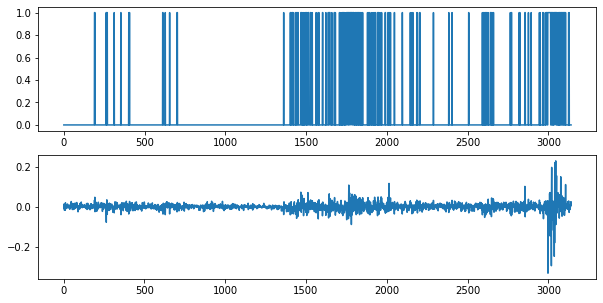

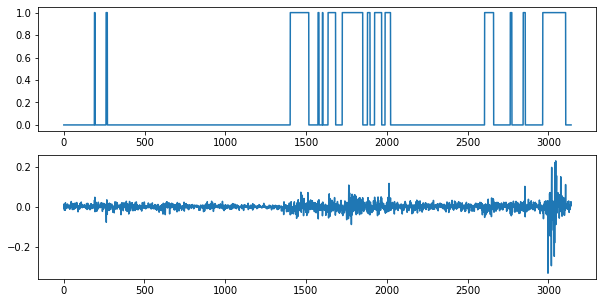

In [ ]:
hmm_plot(dfs, 'OPEC')

### Khodro

In [ ]:
visualize(dfs,'Khodro','Date-S',0.2,100,2600)

(0         5471.3
 1         5484.9
 2         5653.1
 3         5789.0
 4         5789.0
           ...   
 3137    602740.0
 3138    614350.0
 3139    598425.0
 3140    580279.0
 3141    578246.0
 Name: Khodro, Length: 3142, dtype: float64, array([0, 1, 1, ..., 0, 0, 0]))

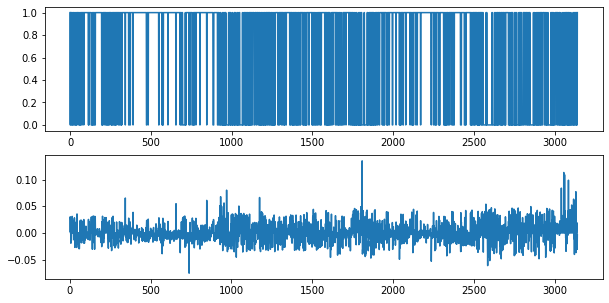

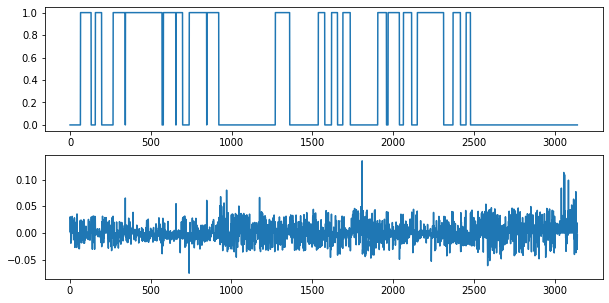

In [ ]:
hmm_plot(dfs, 'Khodro')

## BTC

In [ ]:
dfs = pd.read_csv("BTC_Daily.csv")
dfs = dfs[::-1].reset_index()
dfs

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1492,"Jul 05, 2017","2,627.9","2,617.3","2,642.7","2,562.0",89.72K,0.40%
1,1491,"Jul 06, 2017","2,614.2","2,627.9","2,634.8","2,581.8",60.16K,-0.52%
2,1490,"Jul 07, 2017","2,513.9","2,614.2","2,617.5","2,484.7",90.45K,-3.84%
3,1489,"Jul 08, 2017","2,564.9","2,513.9","2,568.7","2,480.6",54.51K,2.03%
4,1488,"Jul 09, 2017","2,511.4","2,564.9","2,576.7","2,509.6",39.16K,-2.08%
...,...,...,...,...,...,...,...,...
1488,4,"Aug 01, 2021","39,878.3","41,510.0","42,565.0","39,556.5",80.33K,-4.03%
1489,3,"Aug 02, 2021","39,168.4","39,869.8","40,449.0","38,692.5",74.81K,-1.78%
1490,2,"Aug 03, 2021","38,130.3","39,167.4","39,766.6","37,688.2",0.26K,-2.65%
1491,1,"Aug 04, 2021","39,736.9","38,188.4","39,956.5","37,556.0",79.22K,4.21%


In [ ]:
dfs['Price'] = np.array([float(x.replace(',', '')) for x in dfs['Price']])
dfs

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1492,"Jul 05, 2017",2627.9,"2,617.3","2,642.7","2,562.0",89.72K,0.40%
1,1491,"Jul 06, 2017",2614.2,"2,627.9","2,634.8","2,581.8",60.16K,-0.52%
2,1490,"Jul 07, 2017",2513.9,"2,614.2","2,617.5","2,484.7",90.45K,-3.84%
3,1489,"Jul 08, 2017",2564.9,"2,513.9","2,568.7","2,480.6",54.51K,2.03%
4,1488,"Jul 09, 2017",2511.4,"2,564.9","2,576.7","2,509.6",39.16K,-2.08%
...,...,...,...,...,...,...,...,...
1488,4,"Aug 01, 2021",39878.3,"41,510.0","42,565.0","39,556.5",80.33K,-4.03%
1489,3,"Aug 02, 2021",39168.4,"39,869.8","40,449.0","38,692.5",74.81K,-1.78%
1490,2,"Aug 03, 2021",38130.3,"39,167.4","39,766.6","37,688.2",0.26K,-2.65%
1491,1,"Aug 04, 2021",39736.9,"38,188.4","39,956.5","37,556.0",79.22K,4.21%


In [ ]:
dfs.describe()

,index,Price
count,1493.000000,1493.000000
mean,746.000000,13567.268520
std,431.136289,13625.151132
min,0.000000,1914.100000
25%,373.000000,6474.000000
50%,746.000000,8738.800000
75%,1119.000000,11533.900000
max,1492.000000,63540.900000


In [ ]:
visualize(dfs,'Price','Date',0.2,100,1200)

(0        2627.9
 1        2614.2
 2        2513.9
 3        2564.9
 4        2511.4
          ...   
 1488    39878.3
 1489    39168.4
 1490    38130.3
 1491    39736.9
 1492    40947.2
 Name: Price, Length: 1493, dtype: float64, array([0, 0, 0, ..., 0, 0, 0]))

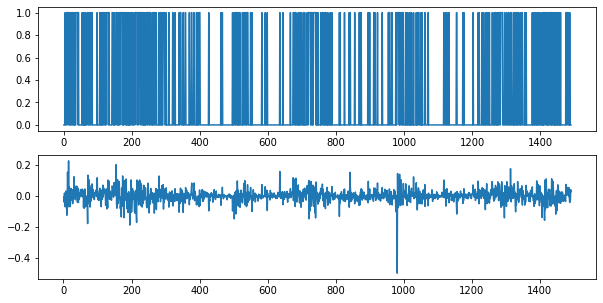

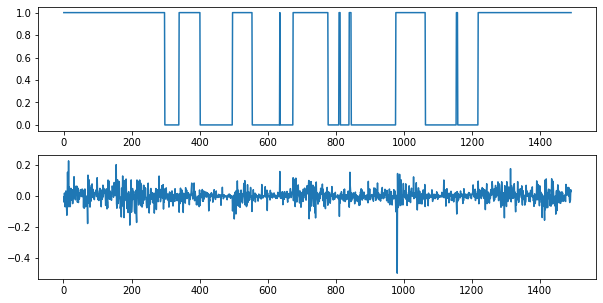

In [ ]:
hmm_plot(dfs, 'Price')

## ETH

In [ ]:
dfs = pd.read_csv("ETH_Daily.csv")
dfs = dfs[::-1].reset_index()
dfs

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1492,"Jul 05, 2017",264.77,266.68,272.12,249.53,436.76K,-0.72%
1,1491,"Jul 06, 2017",265.35,264.77,273.00,258.37,240.42K,0.22%
2,1490,"Jul 07, 2017",238.38,265.35,265.80,233.84,496.51K,-10.16%
3,1489,"Jul 08, 2017",245.23,238.38,246.66,226.68,365.16K,2.87%
4,1488,"Jul 09, 2017",234.97,245.23,249.00,234.15,201.47K,-4.18%
...,...,...,...,...,...,...,...,...
1488,4,"Aug 01, 2021","2,556.23","2,530.94","2,696.38","2,515.26",1.20M,0.95%
1489,3,"Aug 02, 2021","2,608.04","2,556.07","2,664.73","2,513.51",970.67K,2.03%
1490,2,"Aug 03, 2021","2,506.65","2,608.01","2,631.43","2,445.49",158.45K,-3.89%
1491,1,"Aug 04, 2021","2,725.29","2,506.50","2,766.46","2,462.32",1.23M,8.72%


In [ ]:
dfs['Price'] = np.array([float(x.replace(',', '')) for x in dfs['Price']])
dfs

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1492,"Jul 05, 2017",264.77,266.68,272.12,249.53,436.76K,-0.72%
1,1491,"Jul 06, 2017",265.35,264.77,273.00,258.37,240.42K,0.22%
2,1490,"Jul 07, 2017",238.38,265.35,265.80,233.84,496.51K,-10.16%
3,1489,"Jul 08, 2017",245.23,238.38,246.66,226.68,365.16K,2.87%
4,1488,"Jul 09, 2017",234.97,245.23,249.00,234.15,201.47K,-4.18%
...,...,...,...,...,...,...,...,...
1488,4,"Aug 01, 2021",2556.23,"2,530.94","2,696.38","2,515.26",1.20M,0.95%
1489,3,"Aug 02, 2021",2608.04,"2,556.07","2,664.73","2,513.51",970.67K,2.03%
1490,2,"Aug 03, 2021",2506.65,"2,608.01","2,631.43","2,445.49",158.45K,-3.89%
1491,1,"Aug 04, 2021",2725.29,"2,506.50","2,766.46","2,462.32",1.23M,8.72%


In [ ]:
dfs.describe()

,index,Price
count,1493.000000,1493.000000
mean,746.000000,583.643094
std,431.136289,698.756351
min,0.000000,83.810000
25%,373.000000,187.580000
50%,746.000000,292.660000
75%,1119.000000,593.800000
max,1492.000000,4167.780000


In [ ]:
visualize(dfs,'Price','Date',0.2,100,1200)

(0        264.77
 1        265.35
 2        238.38
 3        245.23
 4        234.97
          ...   
 1488    2556.23
 1489    2608.04
 1490    2506.65
 1491    2725.29
 1492    2808.77
 Name: Price, Length: 1493, dtype: float64, array([0, 0, 0, ..., 0, 0, 0]))

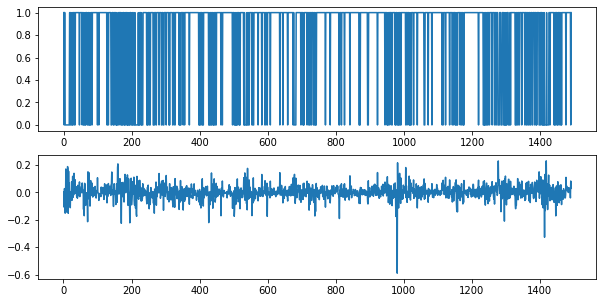

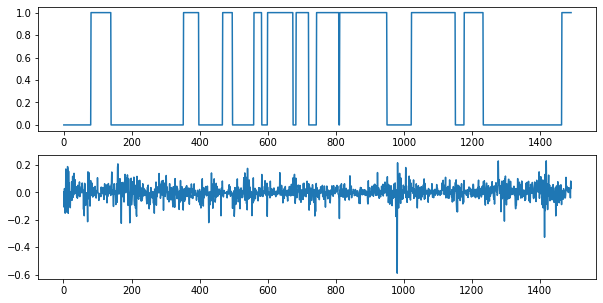

In [ ]:
hmm_plot(dfs, 'Price')

## ADA

In [ ]:
dfs = pd.read_csv("ADA_Daily.csv")
dfs = dfs[::-1].reset_index()
dfs

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1313,"Dec 31, 2017",0.710000,0.590000,0.740000,0.590000,17.22M,20.34%
1,1312,"Jan 01, 2018",0.702200,0.710000,0.715000,0.632000,17.95M,-1.10%
2,1311,"Jan 02, 2018",0.762000,0.702200,0.800000,0.675000,10.97M,8.52%
3,1310,"Jan 03, 2018",1.080000,0.978180,1.090000,0.888210,20.23M,41.73%
4,1309,"Jan 04, 2018",1.104300,1.100000,1.350000,1.050000,19.60M,2.25%
...,...,...,...,...,...,...,...,...
1309,4,"Aug 01, 2021",1.316261,1.317785,1.386836,1.299556,328.16M,-0.02%
1310,3,"Aug 02, 2021",1.308646,1.314328,1.348538,1.296125,231.98M,-0.58%
1311,2,"Aug 03, 2021",1.364798,1.308642,1.382237,1.262617,-,4.29%
1312,1,"Aug 04, 2021",1.375899,1.364798,1.392984,1.323706,325.17M,0.81%


In [ ]:
visualize(dfs,'Price','Date',0.2,100,1000)

(0       0.710000
 1       0.702200
 2       0.762000
 3       1.080000
 4       1.104300
           ...   
 1309    1.316261
 1310    1.308646
 1311    1.364798
 1312    1.375899
 1313    1.390020
 Name: Price, Length: 1314, dtype: float64, array([0, 1, 1, ..., 0, 0, 0]))

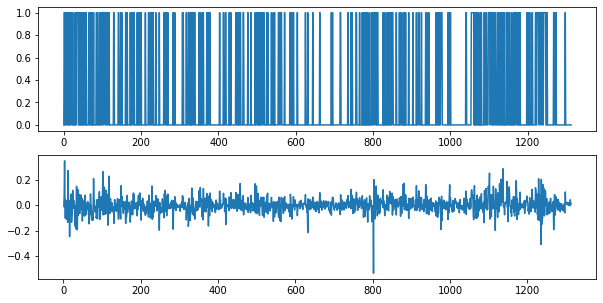

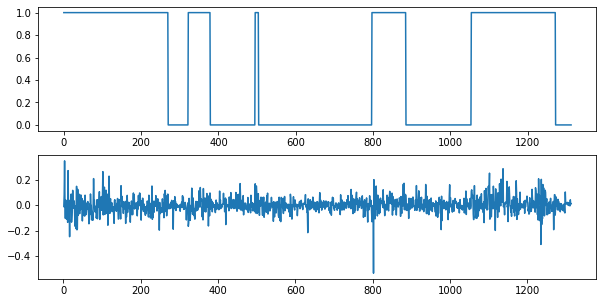

In [ ]:
hmm_plot(dfs, 'Price')

## Results

In [3]:
results = pd.read_csv("results.csv")

In [ ]:
results

,MI,Model,Name,Perc,acc,f1,recal
0,0.060884,LSTM,Tesla,0.619469,0.665823,0.679612,0.752688
1,0.065144,GRU,Tesla,0.622807,0.670886,0.685990,0.763441
2,0.045411,XGBoost,Tesla,0.568058,0.624051,0.678223,0.841398
3,0.096797,LSTM with 44 previous data,Tesla,0.747440,0.715984,0.670750,0.608333
4,0.112927,GRU with 44 previous data,Tesla,0.712366,0.733157,0.724044,0.736111
5,0.105471,XGBoost with 44 previous data,Tesla,0.701058,0.725231,0.718157,0.736111
6,0.046708,LSTM,LIVE,0.570033,0.670886,0.573770,0.577558
7,0.052866,GRU,LIVE,0.569697,0.674684,0.593997,0.620462
8,0.045725,XGBoost,LIVE,0.634146,0.686076,0.511811,0.429043
9,0.075432,LSTM with 44 previous data,LIVE,0.738255,0.737120,0.525060,0.407407


In [4]:
import warnings
warnings.filterwarnings("ignore")

### Tesla

In [5]:
tesla = results.loc[results['Name'] == 'Tesla']
tesla.Model

0                             LSTM
1                              GRU
2                          XGBoost
3       LSTM with 44 previous data
4        GRU with 44 previous data
5    XGBoost with 44 previous data
Name: Model, dtype: object

In [ ]:
tesla

,MI,Model,Name,Perc,acc,f1,recal
0,0.060884,LSTM,Tesla,0.619469,0.665823,0.679612,0.752688
1,0.065144,GRU,Tesla,0.622807,0.670886,0.685990,0.763441
2,0.045411,XGBoost,Tesla,0.568058,0.624051,0.678223,0.841398
3,0.096797,LSTM with 44 previous data,Tesla,0.747440,0.715984,0.670750,0.608333
4,0.112927,GRU with 44 previous data,Tesla,0.712366,0.733157,0.724044,0.736111
5,0.105471,XGBoost with 44 previous data,Tesla,0.701058,0.725231,0.718157,0.736111


In [ ]:
list(tesla)[3:]

['Perc', 'acc', 'f1', 'recal']

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

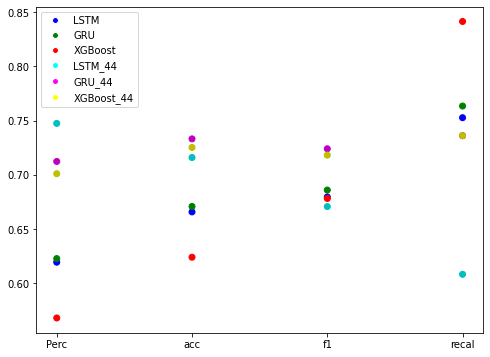

In [7]:
# Tesla

colors = ['b','g','r','c','m','y']
y=[tesla['Perc'],tesla['acc'],tesla['f1'],tesla['recal']]
x=[1,2,3,4]

plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=2)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### LIVE

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

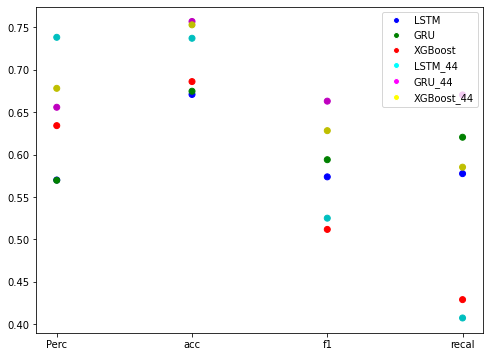

In [8]:
# LIVE
LIVE = results.loc[results['Name'] == 'LIVE']

colors = ['b','g','r','c','m','y']
y=[LIVE['Perc'],LIVE['acc'],LIVE['f1'],LIVE['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=1)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 000001

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

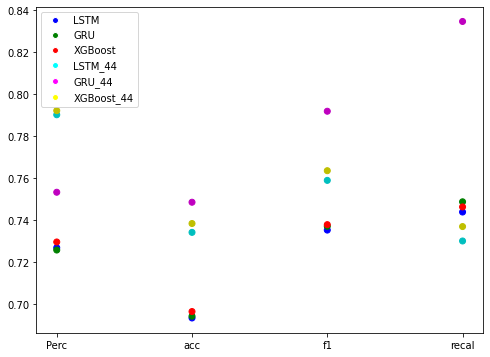

In [9]:
# 001
data_001 = results.loc[results['Name'] == '001']

colors = ['b','g','r','c','m','y']
y=[data_001['Perc'],data_001['acc'],data_001['f1'],data_001['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=2)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 000004

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

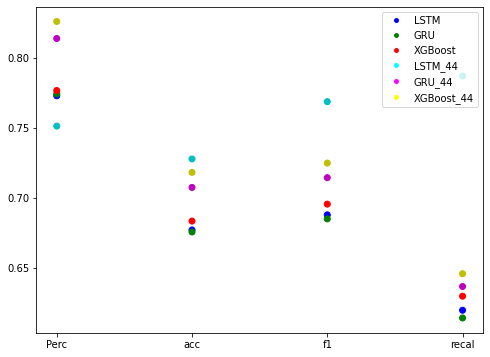

In [10]:
# 004
data_004 = results.loc[results['Name'] == '004']

colors = ['b','g','r','c','m','y']
y=[data_004['Perc'],data_004['acc'],data_004['f1'],data_004['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=1)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 399001

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

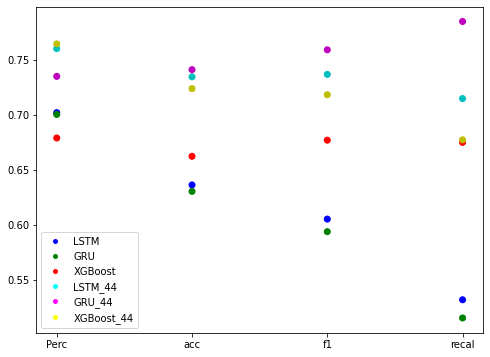

In [11]:
# 99001
data_99001 = results.loc[results['Name'] == '99001']

colors = ['b','g','r','c','m','y']
y=[data_99001['Perc'],data_99001['acc'],data_99001['f1'],data_99001['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=3)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 600601

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

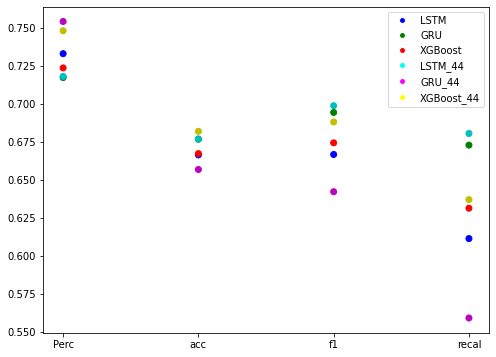

In [12]:
# 601
data_601 = results.loc[results['Name'] == '601']

colors = ['b','g','r','c','m','y']
y=[data_601['Perc'],data_601['acc'],data_601['f1'],data_601['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=1)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])

### 600615

[Text(0, 0, 'Perc'), Text(0, 0, 'acc'), Text(0, 0, 'f1'), Text(0, 0, 'recal')]

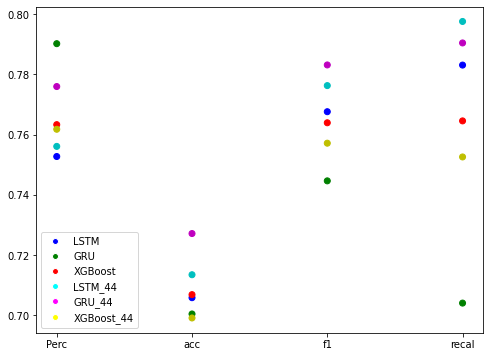

In [13]:
# 615
data_615 = results.loc[results['Name'] == '615']

colors = ['b','g','r','c','m','y']
y=[data_615['Perc'],data_615['acc'],data_615['f1'],data_615['recal']]
x=[1,2,3,4]
plt.figure(figsize=(8,6))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye,c=colors)

LSTM = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="blue")
GRU = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
XGBoost = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
LSTM_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="cyan")
GRU_44 = plt.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta")
XGBoost_44 = plt.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="yellow")

plt.legend((LSTM,GRU,XGBoost,LSTM_44, GRU_44, XGBoost_44),('LSTM','GRU', 'XGBoost', 'LSTM_44', 'GRU_44', 'XGBoost_44'),numpoints=1, loc=3)

plt.xticks([1,2,3,4])
plt.axes().set_xticklabels(['Perc', 'acc', 'f1', 'recal'])